# Clasifikasi penyakit Jantung

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. umber of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 1. Define business problems dan goals

Pada dataset ini memberkan informasi mengenai pasien yang memiliki penyakit jantung, sehingga berikut beberapa paparan atau poinnya:

Business Problems:
1.   Mengetahui relasi antara beberapa variabel dengan perkembangan penyakit jantung
2.   Mengidentifikasi pasien yang berisiko tinggi terkena penyakit jantung


Goals:
1.   Membuat model untuk mengklasifikasi pasien terkena serangan jantung





### 2.Define the workflow you would use if you’re a data scientist working in this case 


*   Langkah pertama yaitu melakukan data preparation, karena langkah inilah yang gunanya untuk menyiapkan data sebelum dilakukannya analisis
*   Kedua adalah EDA, pada tahap ini dilakukan eksplorasi data yang gunanya untuk mengetahui isi variabel, relasi antar variabel dan persebaran datanya. Dan juga melakukan handling terhadap missing values ataupun outliers
*   ketiga, Melakukan penambahan fitur atau feature engineering, hal ini dilakukan untuk membuat variabel baru guna menambah akurasi dari pemodelan yang akan dibuat
*   Keempat, Membuat pemodelan atau model machine learning. Setelah datanya dilakukan EDA maka data tersebut sudah siap untuk dilakukan pemodelan
*   Kelima, melakukan evaluasi dari model yang sudah dibuat





### 3.Check the quality of the dataset (missing value, duplicates, outliers, data imbalance)

In [6]:
df.shape

(1025, 14)

In [7]:
#mengecek missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak terdapat sama sekali missing value

In [8]:
#mengecek data duplikat
df.duplicated().sum()

723

Terdapat 723 data yang duplikat (lebih dari 50%)

In [9]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

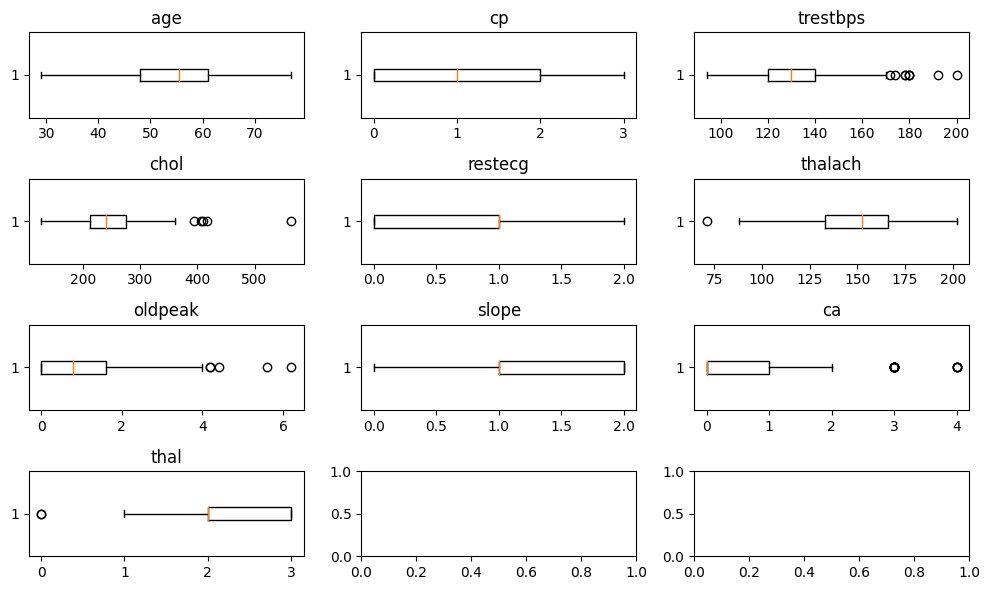

In [10]:
#outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))
for ax, column in zip(axes.ravel(), ['age', 'cp', 'trestbps', 'chol','restecg','thalach',
                                    'oldpeak','slope','ca','thal']):
    ax.boxplot(df[column], vert=False)
    ax.set_title(column)
plt.tight_layout()
plt.show()

Terdapat ouliers yang cukup terlihat yaitu trestbps, chol, oldpeak

In [11]:
for i in (df.columns):
  if(df[i].dtypes in['int64','float64']):
    print(i,':',df[i].dtypes)

    Q1 = df[i].quantile(0.25)
    print('Q1',Q1)

    Q3 = df[i].quantile(0.75)
    print('Q3',Q3)

    IQR = Q3-Q1
    print('IQR',IQR)

    nilai_min = df[i].min()
    nilai_max = df[i].max()

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR

    #Mencari Outlier
    if(nilai_min < min_IQR):
      print('Low outlier is found<', min_IQR)
      print('Low outlier Index :', list(df[df[i] < min_IQR].index))

    if(nilai_max > max_IQR):
      print('High outlier is found>', max_IQR)
      print('High outlier Index :', list(df[df[i] > max_IQR].index))

    print('\n')

age : int64
Q1 48.0
Q3 61.0
IQR 13.0


sex : int64
Q1 0.0
Q3 1.0
IQR 1.0


cp : int64
Q1 0.0
Q3 2.0
IQR 2.0


trestbps : int64
Q1 120.0
Q3 140.0
IQR 20.0
High outlier is found> 170.0
High outlier Index : [29, 47, 87, 137, 151, 175, 343, 396, 528]


chol : int64
Q1 211.0
Q3 274.75
IQR 63.75
High outlier is found> 370.375
High outlier Index : [123, 158, 179, 255, 450]


fbs : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found> 0.0
High outlier Index : [1, 4, 11, 14, 19, 27, 28, 47, 49, 50, 63, 66, 72, 74, 76, 89, 94, 101, 114, 123, 135, 148, 154, 171, 175, 185, 193, 210, 228, 240, 244, 269, 292, 343, 348, 356, 363, 389, 396, 555, 570, 580, 629, 708, 719]


restecg : int64
Q1 0.0
Q3 1.0
IQR 1.0


thalach : int64
Q1 133.25
Q3 166.0
IQR 32.75
Low outlier is found< 84.125
Low outlier Index : [267]


exang : int64
Q1 0.0
Q3 1.0
IQR 1.0


oldpeak : float64
Q1 0.0
Q3 1.6
IQR 1.6
High outlier is found> 4.0
High outlier Index : [6, 13, 54, 69, 528]


slope : int64
Q1 1.0
Q3 2.0
IQR 1.0


ca : int6

Outlier Handle dengan mengambil ambang batas 0.75 (percentile 0.75) hal ini dikarenakan jumlah row yang sedikit

In [12]:
#trestbps
Q1_trestbps  = df['trestbps'].quantile(0.25)
Q3_trestbps  = df['trestbps'].quantile(0.75)
IQR_trestbps  = Q3_trestbps  - Q1_trestbps 

In [13]:
outliers_trestbps = (df['trestbps'] < (Q1_trestbps - 1.5 * IQR_trestbps)) | (df['trestbps'] > (Q3_trestbps + 1.5 * IQR_trestbps))


In [14]:
 df = df.loc[~outliers_trestbps]

In [15]:
#chol
Q1_chol  = df['chol'].quantile(0.25)
Q3_chol  = df['chol'].quantile(0.75)
IQR_chol  = Q3_chol  - Q1_chol

In [16]:
outliers_chol = (df['chol'] < (Q1_chol - 1.5 * IQR_chol)) | (df['chol'] > (Q3_chol + 1.5 * IQR_chol))


In [17]:
 df = df.loc[~outliers_chol]

In [18]:
#oldpeak
Q1_oldpeak  = df['oldpeak'].quantile(0.25)
Q3_oldpeak  = df['oldpeak'].quantile(0.75)
IQR_oldpeak  = Q3_oldpeak  - Q1_oldpeak 

In [19]:
outliers_oldpeak = (df['oldpeak'] < (Q1_oldpeak - 1.5 * IQR_oldpeak)) | (df['oldpeak'] > (Q3_oldpeak + 1.5 * IQR_oldpeak))


In [20]:
 df = df.loc[~outliers_oldpeak]

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [22]:
#data imbalance
#menghitung jumlah data pada setiap kelas target
target_count = df['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 126
Class 1: 158
Proportion: 0.8 : 1


### 4. Check the descriptive statistics of the dataset (mean, distributions, etc)

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,54.095070,0.700704,0.982394,129.848592,242.295775,0.140845,0.524648,149.683099,0.316901,0.952113,1.426056,0.693662,2.295775,0.556338
std,9.144392,0.458758,1.031161,15.371776,44.576339,0.348476,0.514206,23.131020,0.466090,1.024589,0.598724,0.984596,0.609567,0.497693
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.750000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


### 5. Check the correlation between features

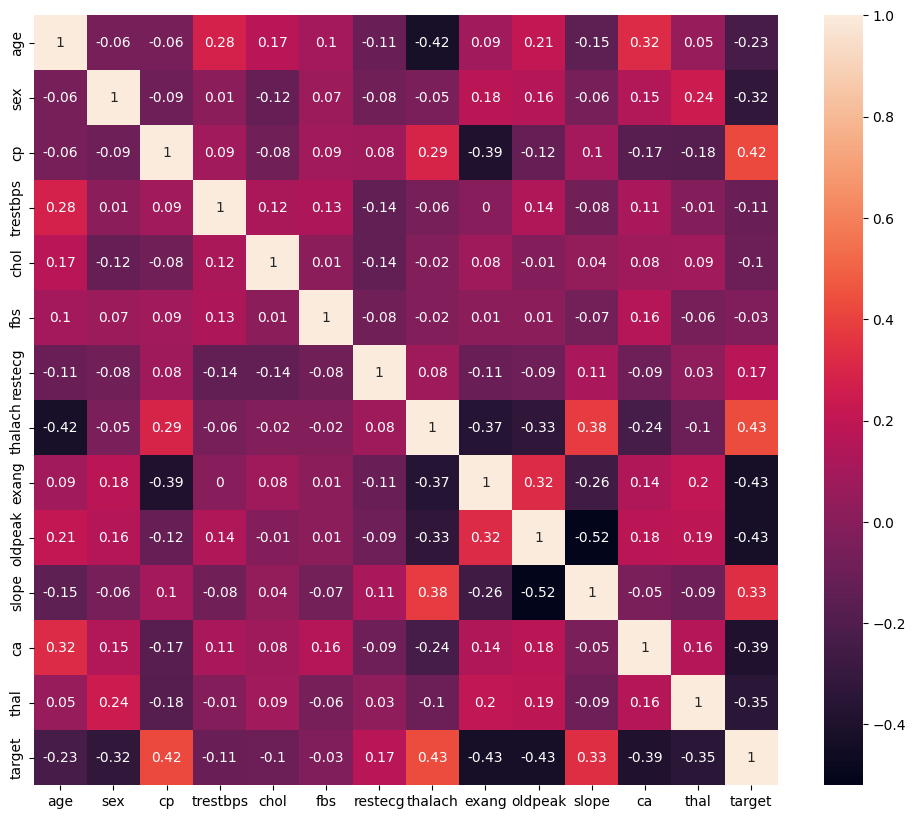

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(round(correlation_matrix,2), annot=True)
plt.show()


Berdasarkan visualisasi diatas, bahwa ternyata usia memiliki korelasi negatif terhadap target. Ada beberapa variabel yang memiliki positif correlation terhadap target seperti (cp, restecg, thalach, and slope) 

In [25]:
# sns.pairplot(df, hue='target')

### 6. Visualize points 4 and 5

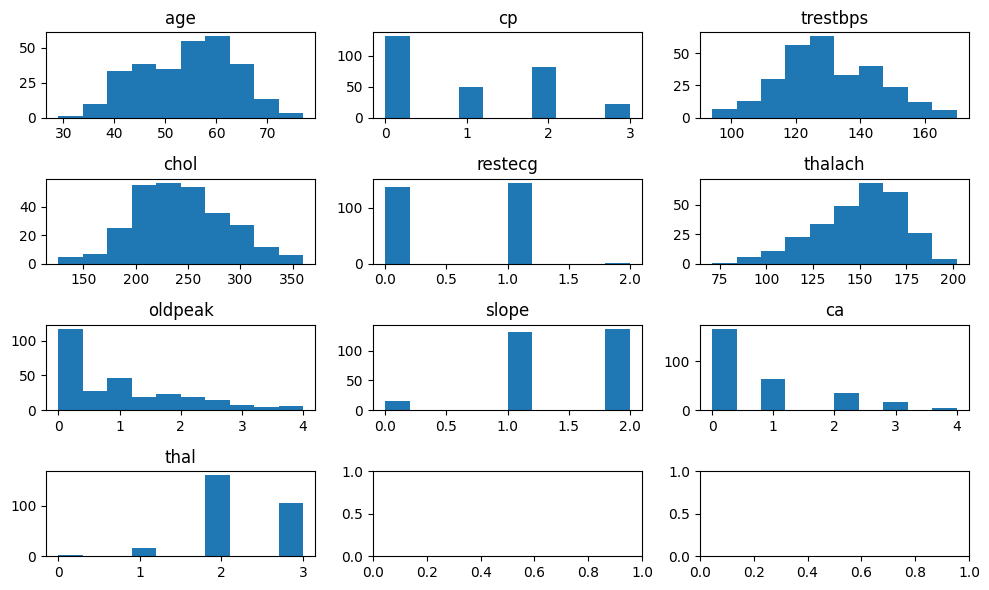

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 6))
for ax, column in zip(axes.ravel(), ['age', 'cp', 'trestbps', 'chol','restecg','thalach',
                                    'oldpeak','slope','ca','thal']):
    ax.hist(df[column])
    ax.set_title(column)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender vs target\n')

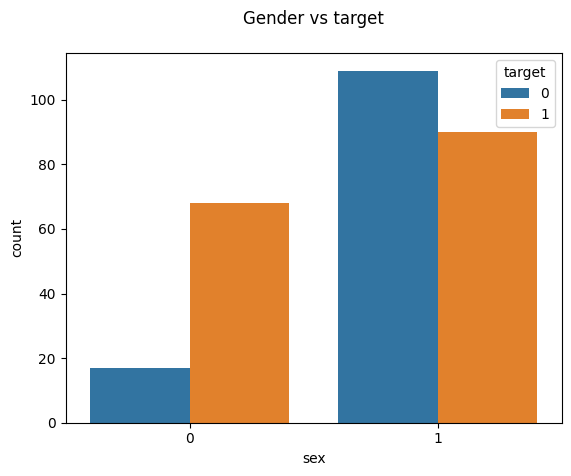

In [27]:
sns.countplot(data= df, x='sex',hue='target')
plt.title('Gender vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

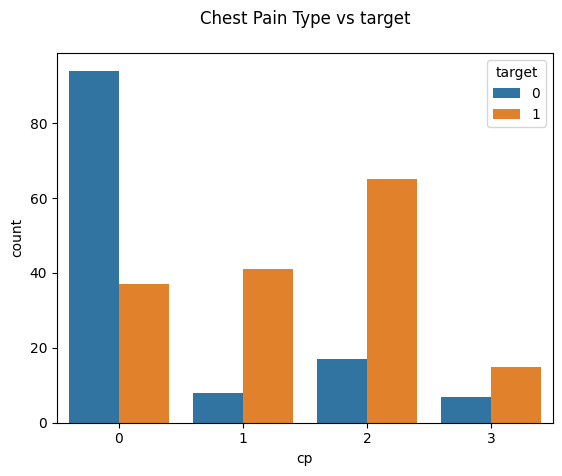

In [28]:
sns.countplot(data= df, x='cp',hue='target')
plt.title('Chest Pain Type vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

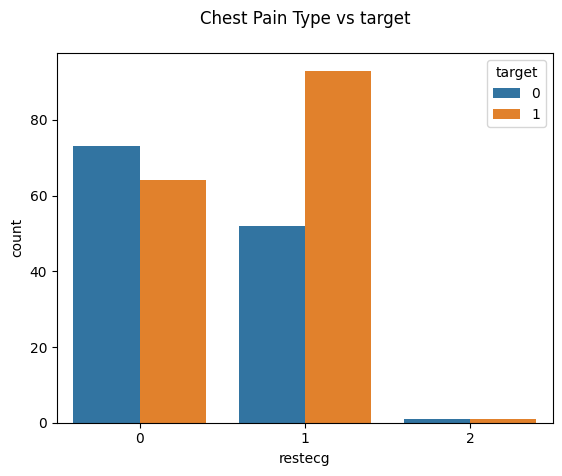

In [29]:
sns.countplot(data= df, x='restecg',hue='target')
plt.title('Chest Pain Type vs target\n')

Text(0.5, 1.0, 'Chest Pain Type vs target\n')

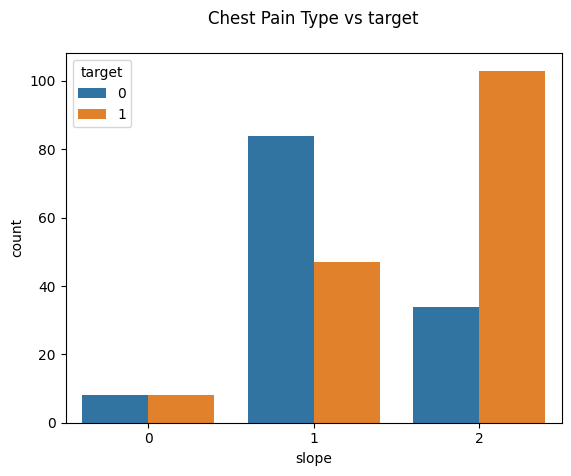

In [30]:
sns.countplot(data= df, x='slope',hue='target')
plt.title('Chest Pain Type vs target\n')

### 7. Define possible feature engineering through encoding

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Membuat kolom baru katagori berdasarkan umur dengan ('young', 'middle-aged', 'old')

In [32]:
age_bins = [0, 40, 55, 100]
age_labels = ['young', 'middle-aged', 'old']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [33]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,middle-aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,middle-aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,old
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,middle-aged
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,middle-aged
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,old


### 8. Automate EDA through Dataprep, Autovis, Dtale, etc.

In [34]:
# !pip install pandas-profiling

In [35]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')
# prof.to_widgets()

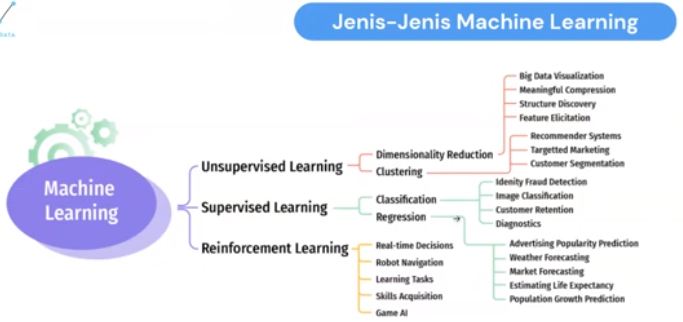

1. Create the hypothesis from the models you will create. 
2. Choose at least 2 models from the live session (or any other you know) and justify why you think it would be beneficial for you to choose the model for the dataset. 
3. Do cross validation and bootstrapping
4. Create at least 2 models
5. List the model evaluation you would use to apply in the project and its justification, and evaluate the models you have created. 
6. List the feature importance from the models you have created and derive insights relating to the feature importance. 

Hipotesis pada model machine learning merupakan suatu asumsi awal atau dugaan yang dibuat oleh pengguna model terkait hubungan antara variabel input dan output pada data yang akan dipelajari.

## Machine Learning Model

### Create the hypothesis from the models you will create.

H0: Tidak ada pengaruh usia pasien dengan resiko terkena penyakit jantung.

H1: Terdapat pengaruh usia pasien dengan resiko terkena penyakit jantung.

### Choose at least 2 models from the live session (or any other you know) and justify why you think it would be beneficial for you to choose the model for the dataset.

1. Random Forest Classifier
2. Decision Tree Classifier

Saya memilih model ini karena saya sudah pernah membaca dan menggunakan model ini, selain itu metode random forest dan decision tree merupakan model yang saling berkaitan sehingga akan menarik untuk membandingkan hasil dari keduanya. Lalu pada Decision Tree sangat cocok dengan dataset yang memiliki variabel diskrit atau kategorikal

#### Separating Dependent and Independent Variables

In [36]:
df.drop('age_category', axis=1, inplace=True)
X = df.drop('target', axis=1)
y = df['target']

### Univariate Selection For categorical Variable

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
bestfeatures = SelectKBest(score_func=chi2)

In [39]:
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_)

In [40]:
dfcolumns = pd.DataFrame(X.columns)

In [41]:
featureScores = pd.concat([dfcolumns,scores],axis=1)
featureScores.columns = ['Label','Score'] 

In [42]:
featureScores.sort_values(by='Score',ascending=False)

,Label,Score
7,thalach,183.893539
11,ca,61.306384
9,oldpeak,58.591152
2,cp,53.647611
8,exang,35.470265
4,chol,25.548353
0,age,22.488556
1,sex,8.733118
10,slope,7.666258
3,trestbps,6.544988


### Droping the features which are not correlated

In [43]:
df.drop(['fbs','restecg'],axis=1,inplace=True)

In [44]:
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0


In [45]:
df.shape

(284, 12)

### Create 2 models

#### Scalling the Data

In [46]:
df.head(2)

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### Spliting Dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [52]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [53]:
y_pred = clf.predict(x_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7894736842105263


#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:
# create the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf.fit(x_train, y_train)

# make predictions on the test set
y_pred = rf.predict(x_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8070175438596491


### Do cross validation and bootstrapping

In [57]:
# Decision Tree
# Now let's use 5-fold cross-validation to evaluate the model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.03


In [58]:
# Random forest
# Now let's use 5-fold cross-validation to evaluate the model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 accuracy with a standard deviation of 0.05


In [59]:
import numpy as np

In [60]:
X_b = df.drop('target', axis=1).values
y_b = df[['target']]

In [61]:
scaler = MinMaxScaler()
X_b = scaler.fit_transform(X)

In [62]:
clf_boot = DecisionTreeClassifier()
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(X_b)), size=len(y_b), replace=True)
    X_boot =X_b[indices]
    y_boot = y_b.iloc[indices]
    # Train the model on the bootstrap sample
    clf_boot.fit(X_boot,y_boot)    
    # Evaluate the model on the entire dataset
    accuracy = clf_boot.score(X_scaled, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.90
95% confidence interval: [0.87, 0.94]


### List the feature importance from the models you have created and derive insights relating to the feature importance.

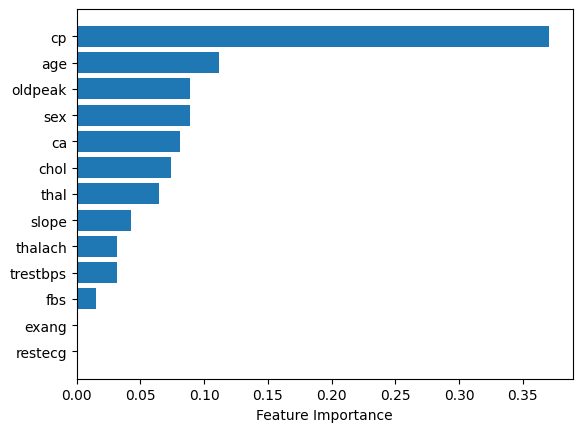

In [63]:
# Create a horizontal bar plot of feature importances
sort = clf.feature_importances_.argsort()
plt.barh(X.columns[sort], clf.feature_importances_[sort])
plt.xlabel("Feature Importance")

plt.show()

Berdasarkan feature importance didapat bahwa variabel "cp" memiliki feature importance tertinggi dengan nilai 0.35 diikuti dengan variabel ca dan oldpeak. Namun Ternyata variabel exang dengan restecg nilainya kurang dari 0.01. Dan Ternyata terdapat berbedaan peringkat antara feature importance dengan python manual dengan mmetodeSelectKBest

#### Testing

In [66]:
X.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [83]:
# Memasukkan data seseorang yang ingin diuji
new_data = [[52, 1, 0, 125, 212, 0, 1, 158, 0, 1, 2, 2, 2]]

# Melakukan scaling pada data baru
new_data_scaled = scaler.transform(new_data)

# Melakukan prediksi pada data baru menggunakan model Random Forest
prediction = rf.predict(new_data_scaled)

# Melihat hasil prediksi
if prediction == 1:
    print("Orang tersebut berpotensi terkena serangan jantung.")
else:
    print("Orang tersebut tidak berpotensi terkena serangan jantung.")

Orang tersebut tidak berpotensi terkena serangan jantung.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
